# 10.1

## a)

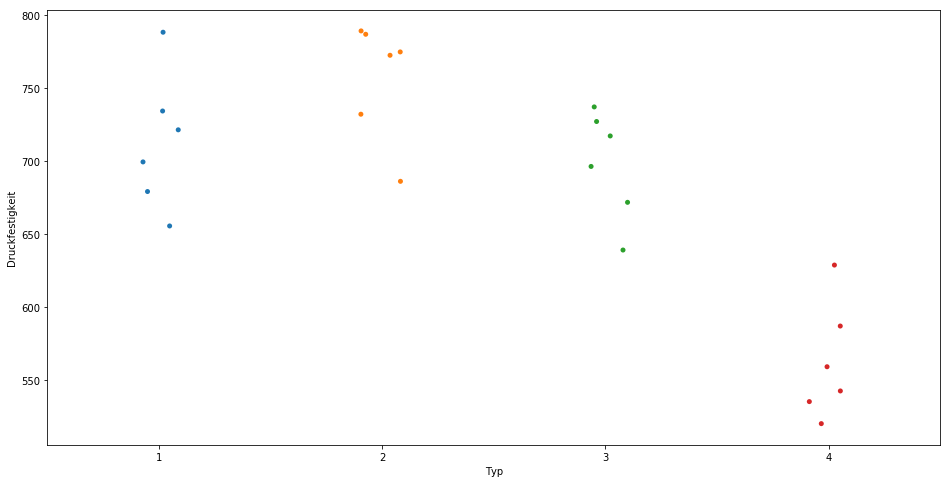

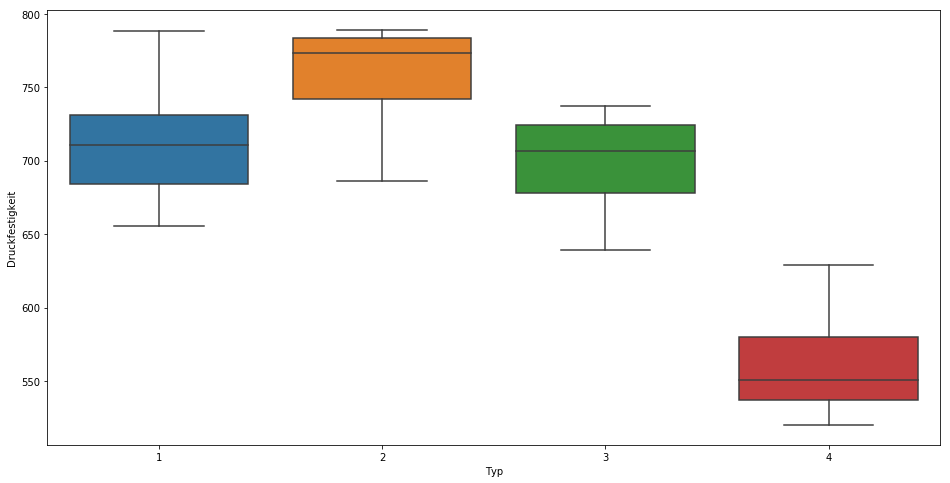

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

druckfestigkeit = pd.DataFrame({
    'Typ': np.repeat(['1', '2', '3', '4'], [6, 6, 6, 6]), # make sure to use strings for types!
    'Druckfestigkeit': [
            655.5, 788.3, 734.3, 721.4, 679.1, 699.4,
            789.2, 772.5, 786.9, 686.1, 732.1, 774.8,
            737.1, 639.0, 696.3, 671.7, 717.2, 727.1,
            535.1, 628.7, 542.4, 559.0, 586.9, 520.0
    ]
})

mpl.rcParams['figure.figsize'] = [16, 8]

sns.stripplot(x='Typ', y='Druckfestigkeit', data=druckfestigkeit)
plt.xlabel('Typ')
plt.ylabel('Druckfestigkeit')
plt.show()

sns.boxplot(x='Typ', y='Druckfestigkeit', data=druckfestigkeit)
plt.xlabel('Typ')
plt.ylabel('Druckfestigkeit')
plt.show()

## b)

Gruppenmittelmodell:

$$ \Upsilon_{ij} = \mu + \tau_i + \varepsilon_{ij} $$

Mit:

- $\mu$: globaler, gemeinsamer Parameter über alle Gruppen
- $\tau_i$: behandlungsspezifische Abweichung vom globalen Parameter $\mu$
- $\varepsilon_{ij}$: Fehlerterm

Paremetrisierung:

$$ \mu = \mu_1 \rightarrow \tau_1 = 0 $$

In [33]:
from statsmodels.formula.api import ols

fit = ols('Druckfestigkeit~Typ', data=druckfestigkeit).fit()
print(fit.params)

Intercept    713.000000
Typ[T.2]      43.933333
Typ[T.3]     -14.933333
Typ[T.4]    -150.983333
dtype: float64


$$ \tau_1 = 0, \tau_2 = 43.933333, \tau_3 = -14.933333, \tau_4 = -150.98333 $$

## c)

Nullhypothese: kein Unterschied zwischen den Typen feststellbar.

Gruppenmittelwerte:

$$ \mu_1 = \mu_2 = \mu_3 = \mu_4 $$

Behandlungseffekte:

$$ \tau_2 = \tau_3 = \tau_4 = 0 $$

Alternativhypothese: Mindestens ein Gruppenpaar $i$ und $j$ mit unterschiedlichem Gruppenmittelwert:

$$ \mu_i \neq \mu_j $$

In [34]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Typ,3.0,127374.754583,42458.251528,25.094289,5.525450e-07
Residual,20.0,33838.975000,1691.948750,NaN,NaN


$$ p = 5.525450 \cdot 10^{-7} \rightarrow p < 5\% $$

Die Nullhypothese wird verworfen!

# 10.2

## a)

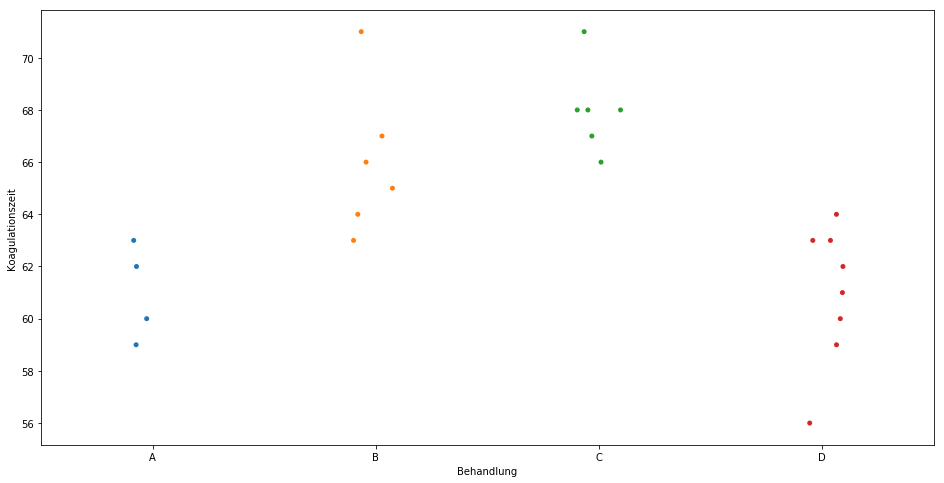

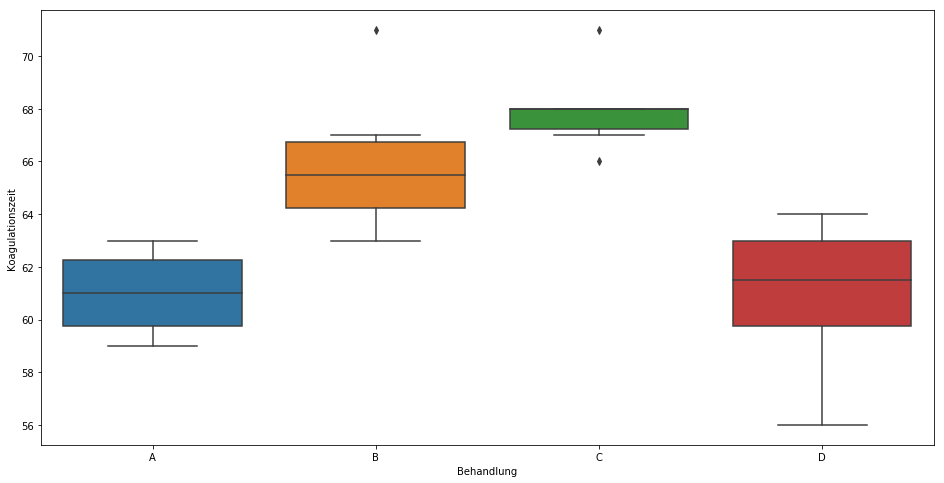

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.figsize'] = [16, 8]

diets = pd.DataFrame({
    'Behandlung': np.repeat(['A', 'B', 'C', 'D'], [4, 6, 6, 8]),
    'Koagulationszeit': [
        62, 60, 63, 59,
        63, 67, 71, 64, 65, 66,
        68, 66, 71, 67, 68, 68,
        56, 62, 60, 61, 63, 64, 63, 59
    ]
})

sns.stripplot(x='Behandlung', y='Koagulationszeit', data=diets)
plt.xlabel('Behandlung')
plt.ylabel('Koagulationszeit')
plt.show()

sns.boxplot(x='Behandlung', y='Koagulationszeit', data=diets)
plt.xlabel('Behandlung')
plt.ylabel('Koagulationszeit')
plt.show()

## b)

optional

## c)

optional

## d)

optional

## e)

optional

## f)

In [46]:
from statsmodels.formula.api import ols

fit = ols('Koagulationszeit~Behandlung', data=diets).fit()
fit.params

Intercept          6.100000e+01
Behandlung[T.B]    5.000000e+00
Behandlung[T.C]    7.000000e+00
Behandlung[T.D]    1.776357e-15
dtype: float64

## g)

In [47]:
from statsmodels.stats.anova import anova_lm
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
Behandlung,3.0,228.0,76.0,13.571429,0.000047
Residual,20.0,112.0,5.6,NaN,NaN
